# K - nearest neighbors

KNN is an intuitive algorithm in which a value is predicted based on the values of the values of its neighbors in a training set.

In [122]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

### Measuring Distance

In order to implement the KNN algorithm we first must have a a method to determine what the closest neighbors of a point are. We can do this with a simple distance formula:

In [123]:
def distance(point, matrix):
    '''
    distance from a point to every point defined by rows in a matrix
    '''
    point = np.array(point).reshape(1,-1)
    point_matrix = np.repeat(point, matrix.shape[0],axis = 1)
    sq_distance_matrix = (point-matrix)**2
    distances = np.sum(sq_distance_matrix,axis=1)**0.5

    return(distances)

Then we just need to find the K closest neighbors to a new point and predict their average or majority value.

In [124]:
def assign_class(distances,k,y):

    distances_classes = zip(distances,y)
    sorted_distances, sorted_classes = zip(*sorted(distances_classes, key = lambda row:row[0]))

    counts = Counter(sorted_classes[:k])
    while len(counts.values()) > 1 and counts.most_common(2)[1][1] == counts.most_common(2)[0][1]:
        k -= 1
        counts = Counter(sorted_classes[:k])

    return(counts.most_common(1)[0][0])

In [125]:
class KNN:
    
    def __init__(self, k):
        self.k = k
        
    def distance(self,point, matrix):
        '''
        distance from a point to every point defined by rows in a matrix
        '''
        point = np.array(point).reshape(1,-1)
        point_matrix = np.repeat(point, matrix.shape[0],axis = 1)
        sq_distance_matrix = (point-matrix)**2
        distances = np.sum(sq_distance_matrix,axis=1)**0.5

        return(distances)
    
    
    def assign_class(self, distances):
        
        k = self.k
        distances_classes = zip(distances,self.y)
        sorted_distances, sorted_classes = zip(*sorted(distances_classes, key = lambda row:row[0]))
        
        counts = Counter(sorted_classes[:k])
        while len(counts.values()) > 1 and counts.most_common(2)[1][1] == counts.most_common(2)[0][1]:
            k -= 1
            counts = Counter(sorted_classes[:k])
        
        return(counts.most_common(1)[0][0])
    
    def fit(self,x,y):
        self.x = x
        self.y = y
    
    def predict(self,x):
        
        predictions = []
        
        for i, row in enumerate(x):
            distances = self.distance(row, self.x)
            predictions.append(self.assign_class(distances))
        
        return(predictions)

In [126]:
def generate_gaussian_clouds(nsample):
    x1 = np.random.normal(2,2.5,(nsample,2))
    x2 = np.random.normal(-2,2.5,(nsample,2))
    x3 = np.random.normal(4,1.5, (nsample,2)) - np.repeat([[4,0]],nsample,axis = 0)
    return np.concatenate((x1,x2,x3),axis = 0), np.array([[1]*nsample,[2]*nsample, [3]*nsample]).flatten()

In [127]:
X,Y = generate_gaussian_clouds(100)

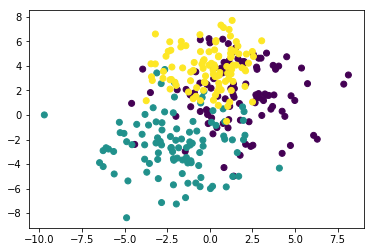

In [128]:
plt.scatter(X[:,0],X[:,1],c = Y)

In [129]:
testKNN = KNN(10)

In [130]:
testKNN.fit(X,Y)

In [131]:
predictions = testKNN.predict(X)

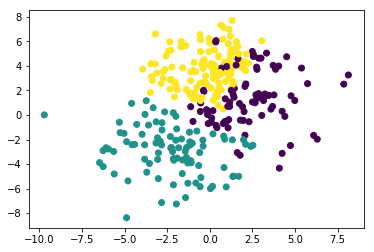

In [132]:
plt.scatter(X[:,0],X[:,1],c = predictions)

In [133]:
sum(predictions == Y)/len(Y)

0.75

In [134]:
vector_space = np.meshgrid(np.linspace(-10,10), np.linspace(-10,10))

In [135]:
predictions = testKNN.predict(np.c_[vector_space[0].ravel(), vector_space[1].ravel()])

In [136]:
predictions = np.array(predictions).reshape(vector_space[0].shape)

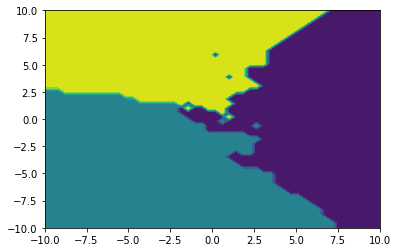

In [137]:
plt.contourf(vector_space[0],vector_space[1], predictions)

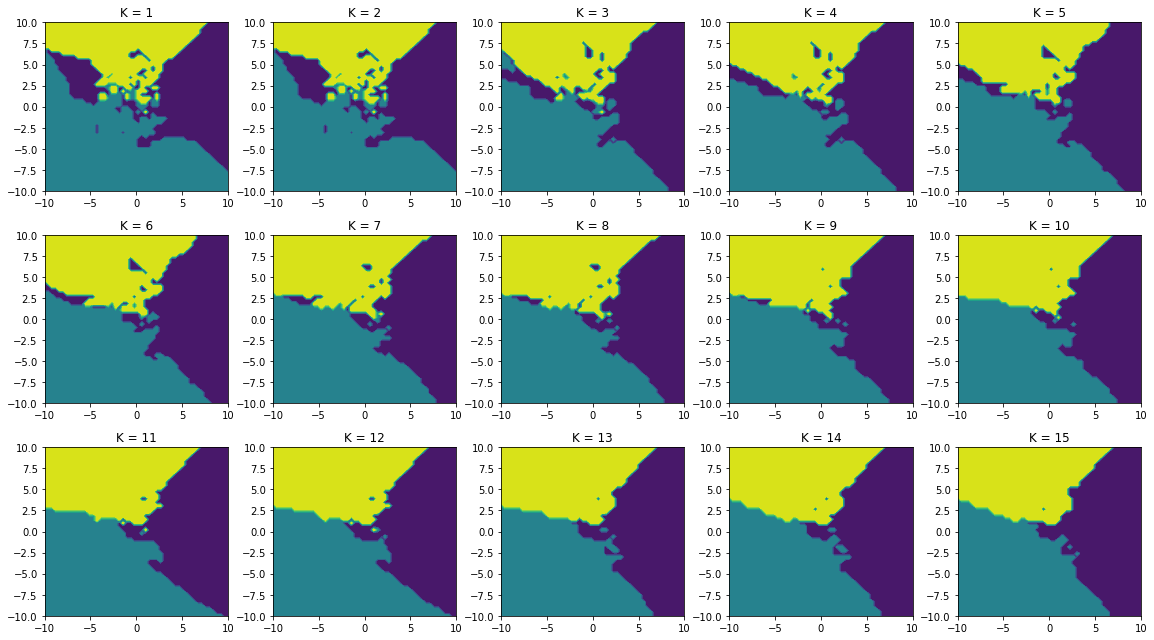

In [138]:
fig, ax = plt.subplots(3,5,figsize = (16,9))
for k in range(1,16):
    knn = KNN(k)
    knn.fit(X,Y)
    vector_space = np.meshgrid(np.linspace(-10,10), np.linspace(-10,10))
    predictions = knn.predict(np.c_[vector_space[0].ravel(), vector_space[1].ravel()])
    predictions = np.array(predictions).reshape(vector_space[0].shape)
    ax[(k-1)//5, (k-1)%5].contourf(vector_space[0],vector_space[1], predictions)
    ax[(k-1)//5, (k-1)%5].set_title('K = ' + str(k))
plt.tight_layout()

If we look at the decision boundaries for various k values depicted above, we can see that as K increases, the boundaries tend to get smoother. Very low K's like K = 1 are likely to overfit, but too high a K value is may not be flexible enough. Finding the optimal K can be achieved with cross validation.